<a href="https://colab.research.google.com/github/toussyn/delivery_app_causal_inference/blob/main/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 687 kB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=f25b0341c4547a1ccd4defa97c0b6fef45ff3acc8ae07967b87f188e85f5a30c
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# Utilities

# create new columns from existing column
def create_column(dframe, new_list, old_column):
  dframe[new_list] = dframe[old_column].str.split(',', 1, expand=True).astype(float)

#convert to datetime
def convert_to_datetime(series):
  series = pd.to_datetime(series)
  return series

In [ ]:
import pandas as pd
import numpy as np
import datashader as ds
import colorcet as cc
import holoviews as hv
from holoviews.element.tiles import EsriImagery, OSM, EsriStreet
from holoviews.operation.datashader import datashade

In [ ]:
df = pd.read_csv('My Drive/10X/Gokada/nb.csv')
df.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


# 1. Basic information about data

Some basic information about the data type, non-null values and memory usage.

In [ ]:
#Basic information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           536020 non-null  int64         
 1   Trip Origin       536020 non-null  object        
 2   Trip Destination  536020 non-null  object        
 3   Trip Start Time   534369 non-null  datetime64[ns]
 4   Trip End Time     536019 non-null  datetime64[ns]
 5   trip_origin_long  536020 non-null  float64       
 6   trip_origin_lat   536020 non-null  float64       
 7   trip_dest_long    536020 non-null  float64       
 8   trip_dest_lat     536020 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 36.8+ MB


(536020, 9)

The Trip Origin and the Trip Destination which cotains latitude and longitude of the origin and destination locations respectively, but they are not in float type. Same goes for the Trip Start Time and Trip End Time which are supposed to be in a datetime object but are not. Let's fix them.  

In [ ]:
def create_column(dframe, new_list, old_column):
  dframe[new_list] = dframe[old_column].str.split(',', 1, expand=True).astype(float)
# create new columns
create_column(df, ['trip_origin_lat', 'trip_origin_long'], 'Trip Origin')
create_column(df, ['trip_dest_lat', 'trip_dest_long'], 'Trip Destination')

df.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,trip_origin_long,trip_origin_lat,trip_dest_long,trip_dest_lat
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,3.377403,6.508813,3.345031,6.650970
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,3.455538,6.431671,3.472189,6.428081
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,3.338898,6.631679,3.359040,6.508324
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,3.367708,6.572757,3.361407,6.584881
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.276634,6.601042,3.391615,6.450107


In [ ]:
#convert to datetime
def convert_to_datetime(series):
  series = pd.to_datetime(series)
  return series

convert_to_datetime(df['Trip Start Time'])
convert_to_datetime(df['Trip End Time'])

# df['Trip Start Time'] = pd.to_datetime(df['Trip Start Time'])
# df['Trip End Time'] = pd.to_datetime(df['Trip End Time'])
df.dtypes

Trip ID                      int64
Trip Origin                 object
Trip Destination            object
Trip Start Time     datetime64[ns]
Trip End Time       datetime64[ns]
trip_origin_long           float64
trip_origin_lat            float64
trip_dest_long             float64
trip_dest_lat              float64
dtype: object

Let's visualize whee most orders ae comming from

In [ ]:
# create point of orders and destination
origin_geo = df[['trip_origin_lat', 'trip_origin_long']]
dest_geo = df[['trip_dest_lat', 'trip_dest_long']]
dest_geo.head(), origin_geo.head()

(   trip_dest_lat  trip_dest_long
 0       6.650970        3.345031
 1       6.428081        3.472189
 2       6.508324        3.359040
 3       6.584881        3.361407
 4       6.450107        3.391615,    trip_origin_lat  trip_origin_long
 0         6.508813          3.377403
 1         6.431671          3.455538
 2         6.631679          3.338898
 3         6.572757          3.367708
 4         6.601042          3.276634)

Now let’s create a basic visualization to represent all the data points accordingly on a canvas. We will paint the canvas black and show all the data points there at their exact location. Visualizing origin of trips first.

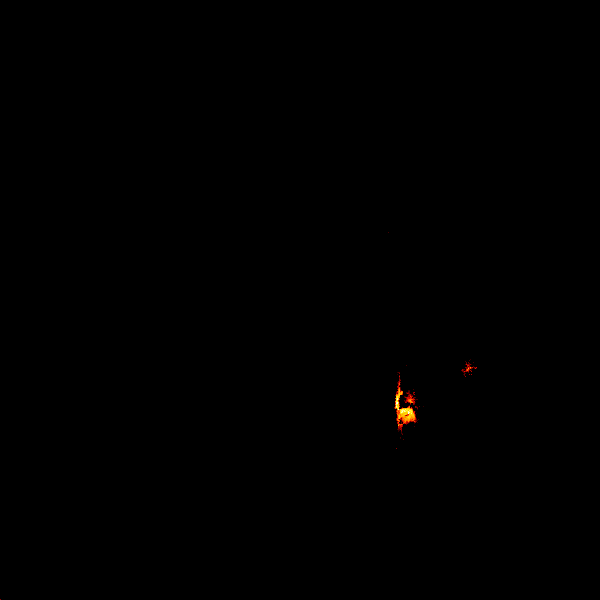

In [ ]:
# origin location plot
agg = ds.Canvas().points(origin_geo, 'trip_origin_lat', 'trip_origin_long')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")

Looks like t

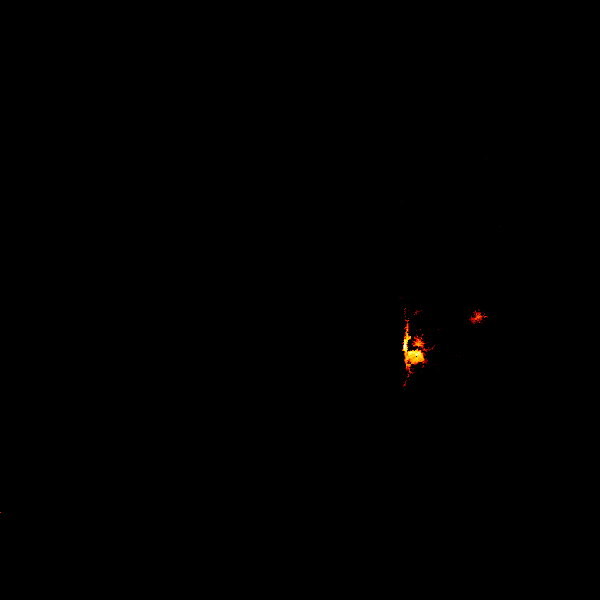

In [ ]:
# destination location plot
agg = ds.Canvas().points(dest_geo, 'trip_dest_lat', 'trip_dest_long')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")

# New Section

Let's see the descriptive statistics that summarize the central tendency of the variable, their dispersion, the presence of empty values and their shape.

In [ ]:
#Describe the data
df.describe()